# Generate backtest

In [7]:
%run ./functions/LoadPampusData.ipynb
%run ./models/BaseCaseYesterday.ipynb

In [2]:
# import packages
import pandas as pd
import datetime as datetime
import matplotlib.pyplot as plt #gives error the first time, just try again# Show all cell outputs:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [3]:
# Load data
file = '../data/HISTORY15MINS.csv'
data = LoadPampusData(file)

In [4]:
# subset data to single timeseries (ts)
seriesname = 'LOAD_1_TOTW_2'
ts1 = data[seriesname]['2016-01-01':'2016-12-23'] #subset where data is most complete

In [11]:
import pandas as pd
import datetime as datetime
import warnings as warnings

In [14]:
datetimestr = ts1
datetimestr = pd.to_datetime(datetimestr)
sliced = data[datetimestr + datetime.timedelta(days = -1) : datetimestr + datetime.timedelta(days = 0)]
shifted = sliced.shift(periods=1, freq='1D', axis=0)

TypeError: Cannot convert input [datetime
2016-01-07 12:45:00   1969-12-31 00:00:00.000002286
2016-01-07 13:00:00   1969-12-31 00:00:00.000002306
2016-01-07 13:15:00   1969-12-31 00:00:00.000002279
2016-01-07 13:30:00   1969-12-31 00:00:00.000002271
2016-01-07 13:45:00   1969-12-31 00:00:00.000000377
2016-01-07 14:00:00   1969-12-31 00:00:00.000000000
2016-01-07 14:15:00   1969-12-31 00:00:00.000000000
2016-01-07 14:30:00   1969-12-31 00:00:00.000000000
2016-01-07 14:45:00   1969-12-31 00:00:00.000000000
2016-01-07 15:00:00   1969-12-31 00:00:00.000003701
2016-01-07 15:15:00   1969-12-31 00:00:00.000003111
2016-01-07 15:30:00   1969-12-31 00:00:00.000001121
2016-01-07 15:45:00   1969-12-31 00:00:00.000000000
2016-01-07 16:00:00   1969-12-31 00:00:00.000000000
2016-01-07 16:15:00   1969-12-31 00:00:00.000000000
2016-01-07 16:30:00   1969-12-31 00:00:00.000000000
2016-01-08 09:15:00   1969-12-31 00:00:00.000000000
2016-01-08 09:30:00   1969-12-31 00:00:00.000000000
2016-01-08 09:45:00   1969-12-31 00:00:00.000000000
2016-01-08 10:00:00   1969-12-31 00:00:00.000000000
2016-01-08 10:15:00   1969-12-31 00:00:00.000000000
2016-01-08 10:30:00   1969-12-31 00:00:00.000000000
2016-01-08 10:45:00   1969-12-31 00:00:00.000000000
2016-01-08 11:00:00   1969-12-31 00:00:00.000000000
2016-01-08 11:15:00   1969-12-31 00:00:00.000000000
2016-01-08 11:30:00   1969-12-31 00:00:00.000000000
2016-01-08 11:45:00   1969-12-31 00:00:00.000000000
2016-01-08 12:00:00   1969-12-31 00:00:00.000000000
2016-01-08 12:15:00   1969-12-31 00:00:00.000000000
2016-01-08 12:30:00   1969-12-31 00:00:00.000000000
                                   ...             
2016-12-23 16:30:00   1969-12-31 00:00:00.000000552
2016-12-23 16:45:00   1969-12-31 00:00:00.000000061
2016-12-23 17:00:00   1969-12-31 00:00:00.000000005
2016-12-23 17:15:00   1969-12-31 00:00:00.000000004
2016-12-23 17:30:00   1969-12-31 00:00:00.000000004
2016-12-23 17:45:00   1969-12-31 00:00:00.000000005
2016-12-23 18:00:00   1969-12-31 00:00:00.000000004
2016-12-23 18:15:00   1969-12-31 00:00:00.000000004
2016-12-23 18:30:00   1969-12-31 00:00:00.000000004
2016-12-23 18:45:00   1969-12-31 00:00:00.000000005
2016-12-23 19:00:00   1969-12-31 00:00:00.000000004
2016-12-23 19:15:00   1969-12-31 00:00:00.000000003
2016-12-23 19:30:00   1969-12-31 00:00:00.000000003
2016-12-23 19:45:00   1969-12-31 00:00:00.000000003
2016-12-23 20:00:00   1969-12-31 00:00:00.000000004
2016-12-23 20:15:00   1969-12-31 00:00:00.000000004
2016-12-23 20:30:00   1969-12-31 00:00:00.000000004
2016-12-23 20:45:00   1969-12-31 00:00:00.000000003
2016-12-23 21:00:00   1969-12-31 00:00:00.000000004
2016-12-23 21:15:00   1969-12-31 00:00:00.000000003
2016-12-23 21:30:00   1969-12-31 00:00:00.000000003
2016-12-23 21:45:00   1969-12-31 00:00:00.000000002
2016-12-23 22:00:00   1969-12-31 00:00:00.000000004
2016-12-23 22:15:00   1969-12-31 00:00:00.000000004
2016-12-23 22:30:00   1969-12-31 00:00:00.000000004
2016-12-23 22:45:00   1969-12-31 00:00:00.000000003
2016-12-23 23:00:00   1969-12-31 00:00:00.000000004
2016-12-23 23:15:00   1969-12-31 00:00:00.000000004
2016-12-23 23:30:00   1969-12-31 00:00:00.000000003
2016-12-23 23:45:00   1969-12-31 00:00:00.000000004
Name: LOAD_1_TOTW_2, dtype: datetime64[ns]] of type <class 'pandas.core.series.Series'> to Timestamp

In [8]:
# Define model
model = BaseCaseYesterday
# Define datetimeFCvector
datetimeFCVector = pd.date_range('2016-12-01 00:00:00', periods = 30, freq='D')

resultDF = pd.DataFrame()
for date in datetimeFCVector:
    result = pd.DataFrame(model(ts1, date));
    result['created'] = date;
    resultDF = resultDF.append(result);

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:16: UserWarning: Insufficient data to forecast datetime. Returning empty series


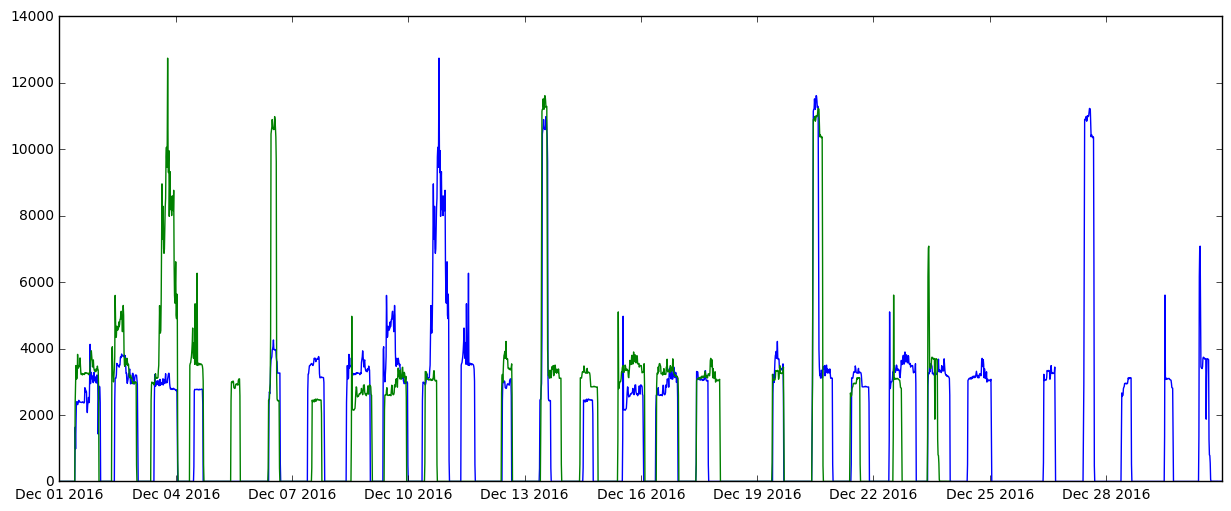

In [6]:
plt.plot(resultDF[seriesname])
plt.plot(ts1['2016-12-01':])
plt.show();

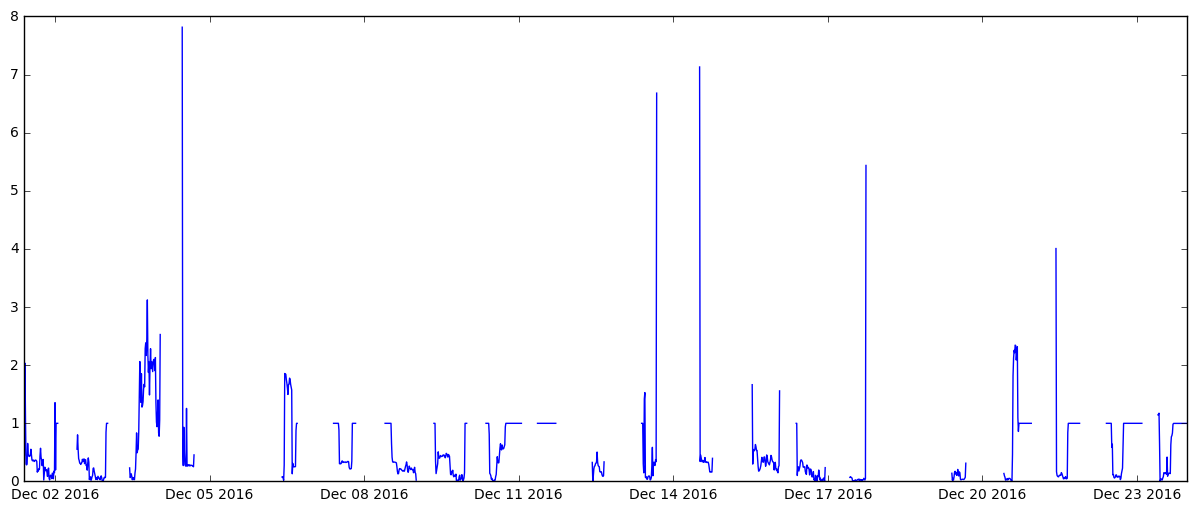

In [7]:
plt.plot(abs((ts1['2016-12-01':]-resultDF[seriesname])/resultDF[seriesname]))
